In [283]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [284]:
# Importando o dataframe
df = pd.read_csv('/content/streaming_data.csv')

In [285]:
# Visualizando os dados
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [286]:
# Visualizando as informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [287]:
# Procurando dados nulos
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

In [288]:
# Fazendo uma descrição dos dados
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [289]:
# Limpando e substituindo os dados
df['Time_on_platform'] = df['Time_on_platform'].fillna(0)
df['Num_streaming_services'] = df['Num_streaming_services'].fillna(0)
df['Churned'] = df['Churned'].fillna(0)
df['Avg_rating'] = df['Avg_rating'].fillna(0)
df['Devices_connected'] = df['Devices_connected'].fillna(0)

In [290]:
# Removendo dados nulos das colunas 'Gender', 'Subscription_type' e 'Age'
df = df.dropna(subset=['Gender', 'Subscription_type', 'Age'])

In [291]:
# Substituindo os valores da coluna 'Churned'
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})

In [292]:
# Convertendo os tipos das colunas
df['Age'] = df['Age'].astype(int)
df['Time_on_platform'] = df['Time_on_platform'].astype(int)
df['Devices_connected'] = df['Devices_connected'].astype(int)
df['Num_streaming_services'] = df['Num_streaming_services'].astype(int)

In [293]:
# Procurando dados nulos
df.isna().sum()

Age                       0
Gender                    0
Time_on_platform          0
Devices_connected         0
Subscription_type         0
Num_streaming_services    0
Num_active_profiles       0
Avg_rating                0
Churned                   0
User_id                   0
dtype: int64

In [294]:
# Visualizando as informações dos dados, após as transformações
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  int64  
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  int64  
 3   Devices_connected       36515 non-null  int64  
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  int64  
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  object 
 9   User_id                 36515 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 3.1+ MB


In [295]:
# Fazendo uma descrição dos dados, após as transformações
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating
count,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000
mean,43.473422,3170.231576,2.039628,0.309434,2.993455,2.337959
std,15.092181,2909.245246,1.820622,0.909600,1.412968,1.609043
min,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,2.000000,1.150000
50%,43.000000,2708.000000,2.000000,0.000000,3.000000,2.440000
75%,57.000000,5741.000000,4.000000,0.000000,4.000000,3.720000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000


In [296]:
# Definindo variáveis X e y para os modelos
X = df.drop(['Churned', 'User_id'], axis = 1)
y = df['Churned']

In [297]:
# Visualizando as informações dos dados de X
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 77883
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  int64  
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  int64  
 3   Devices_connected       36515 non-null  int64  
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  int64  
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [298]:
# Visualizando as informações dos dados de y
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 36515 entries, 0 to 77883
Series name: Churned
Non-Null Count  Dtype 
--------------  ----- 
36515 non-null  object
dtypes: object(1)
memory usage: 570.5+ KB


In [299]:
# Fazendo o dummies dos dados
X = pd.get_dummies(X, columns=['Gender'])
X = pd.get_dummies(X, columns=['Subscription_type'])

In [300]:
# Criando uma variavel para guarda os nomes das colunas
nome_columns = X.columns.tolist()

# Criar uma instância do MinMaxScaler
scaler = MinMaxScaler()

# Normalizando os dados
X = scaler.fit_transform(X)

# Recriando o dataframe normalizado
X = pd.DataFrame(X, columns=nome_columns)

In [301]:
# Divindo os conjuntos em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [302]:
# Criando um modelo de regressão logística
model_LogisticRegression = LogisticRegression()

# Treinando o modelo com os dados de treinamento
model_LogisticRegression.fit(X_train, y_train)

# Fazendo previsões
predictions_LogisticRegression = model_LogisticRegression.predict(X_test)

In [303]:
# Criando um dataframe com os valores de test e sua previsão
df_test = y_test

# Recriando o dataframe
df_test = pd.DataFrame(df_test)

# Adicionando coluna das predições
df_test['predictions'] = predictions_LogisticRegression

In [304]:
# Visualizando os dados originais e os previstos pelo modelo
df_test

,Churned,predictions
63357,No,No
13486,Yes,No
51292,No,No
16745,No,No
31021,Yes,No
...,...,...
26224,Yes,No
45245,Yes,No
57058,No,No
43382,No,No


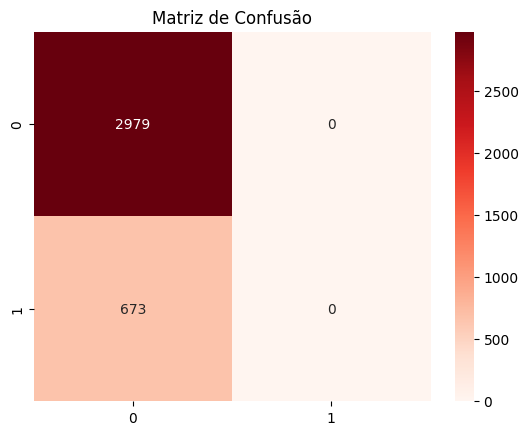

In [305]:
# Calculando a matriz de confusão
conf_matrix_LogisticRegression = confusion_matrix(y_test, predictions_LogisticRegression)

# Plotando a matriz de confusão
sns.heatmap(conf_matrix_LogisticRegression, annot=True, fmt="d", cmap="Reds")
plt.title('Matriz de Confusão')
plt.show()

In [306]:
# Avaliar o desempenho do modelo
acuracia = accuracy_score(y_test, predictions_LogisticRegression)
print(f'Acurácia do modelo de regressão linear: {acuracia * 100:.2f}%')

Acurácia do modelo de regressão linear: 81.57%


In [307]:
# Criando um modelo de regressão logística
model_LogisticRegression = LogisticRegression()

# Definindo os hiperparâmetros para ajuste
param_grid = {
    'penalty': ['l1', 'l2'],  # Tipo de regularização
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Parâmetro de inversão de regularização
}

# Definindo os melhores hiperparâmetros
grid_search = GridSearchCV(model_LogisticRegression, param_grid, cv=5, scoring='accuracy')

# Treinando o modelo
grid_search.fit(X_train, y_train)

# Armazenando os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Avaliando o modelo com os melhores hiperparâmetros no conjunto de teste
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Fazendo previsões
predictions_LogisticRegression_torning = final_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [308]:
# Criando um dataframe com os valores de test e sua previsão
df_test = y_test

# Recriando o dataframe
df_test = pd.DataFrame(df_test)

# Adicionando coluna das predições
df_test['predictions'] = predictions_LogisticRegression_torning

In [309]:
# Visualizando os dados originais e os previstos pelo modelo
df_test

,Churned,predictions
63357,No,No
13486,Yes,No
51292,No,No
16745,No,No
31021,Yes,No
...,...,...
26224,Yes,No
45245,Yes,No
57058,No,No
43382,No,No


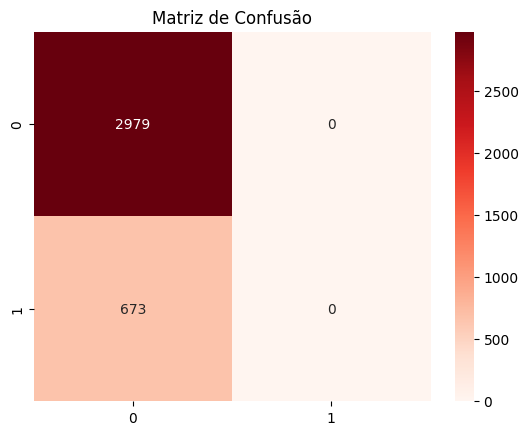

In [310]:
# Calculando a matriz de confusão
conf_matrix_LogisticRegression_torning = confusion_matrix(y_test, predictions_LogisticRegression_torning)

# Plotando a matriz de confusão
sns.heatmap(conf_matrix_LogisticRegression_torning, annot=True, fmt="d", cmap="Reds")
plt.title('Matriz de Confusão')
plt.show()

In [311]:
# Avaliar o desempenho do modelo
acuracia = accuracy_score(y_test, predictions_LogisticRegression_torning)
print(f'Acurácia do modelo de regressão linear: {acuracia * 100:.2f}%')

Acurácia do modelo de regressão linear: 81.57%


In [312]:
# Criando um modelo RandomForest
model_RandomForest = RandomForestClassifier()

# Treinando o modelo com os dados de treinamento
model_RandomForest.fit(X_train, y_train)

# Fazendo previsões
predictions_RandomForest = model_RandomForest.predict(X_test)

In [313]:
# Criando um dataframe com os valores de test e sua previsão
df_test = y_test

# Recriando o dataframe
df_test = pd.DataFrame(df_test)

# Adicionando coluna das predições
df_test['predictions'] = predictions_RandomForest

In [314]:
# Visualizando os dados originais e os previstos pelo modelo
df_test

,Churned,predictions
63357,No,No
13486,Yes,Yes
51292,No,No
16745,No,No
31021,Yes,No
...,...,...
26224,Yes,No
45245,Yes,No
57058,No,No
43382,No,No


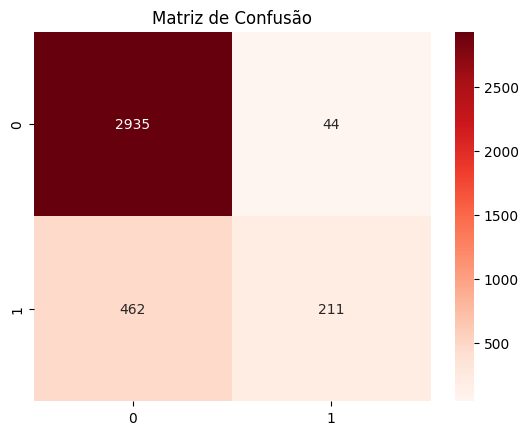

In [315]:
# Calculando a matriz de confusão
conf_matrix_RandomForest = confusion_matrix(y_test, predictions_RandomForest)

# Plotando a matriz de confusão
sns.heatmap(conf_matrix_RandomForest, annot=True, fmt="d", cmap="Reds")
plt.title('Matriz de Confusão')
plt.show()

In [316]:
# Avaliar o desempenho do modelo
acuracia = accuracy_score(y_test, predictions_RandomForest)
print(f'Acurácia do modelo de regressão linear: {acuracia * 100:.2f}%')

Acurácia do modelo de regressão linear: 86.14%
